# Midterm Project

First, all of the imports we will need throughout. Note that the data is saved in a .csv file within a separate data folder.

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

**Note:** Unfortunately, since I cannot see the questions after submission, some may be mislabeled. I did my best to recreate them as I remembered.

### Q1

We will read in the data and use the *shape* function to determine the number of rows. This will be the number of observations.

In [2]:
raw = pd.read_csv('./data/weatherHistory.csv')
raw.shape

(96453, 12)

We have 96,453 observations.

### Q2

We are asked to determine how many of the columns contain nominal data. We can check the column names and first few entries with the *head* function.

In [3]:
raw.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


It seems clear that the only non-numeric data is under the columns *Summary*, *Precip Type*, and *Daily Summary*. So, we have 3 columns containing nominal data.

### Q3

We are trying to predict Humidity using the Temperature data. In order ot do this, we will first initialize a model and fit it in order to find the root mean square error. This will be calculated with the function from *sklearn*.

In [6]:
xtemp = raw['Temperature (C)'].values.reshape(-1,1)
yhum = raw['Humidity'].values.reshape(-1,1)

lin_reg = lm.LinearRegression()
model = lin_reg.fit(xtemp,yhum)
y_pred = model.predict(xtemp)
rmse = np.sqrt(mean_squared_error(yhum,y_pred))

print(rmse)

0.1514437964005473


Our RMSE is *.151444*.

### Q4

In this question, we have to scale the data, then use Ridge regression and k-fold cross validation to find the average RMSE of the model on the testing data.

In [7]:
scale = StandardScaler()
xStemp = scale.fit_transform(xtemp)

kf = KFold(n_splits=20, random_state=2020,shuffle=True)

rid_reg = Ridge(alpha = .1, random_state=2020)

RMSE_test = []
for idxTrain,idxTest in kf.split(xStemp):
    Xtrain = xStemp[idxTrain,:]
    Xtest = xStemp[idxTest,:]
    ytrain = yhum[idxTrain]
    ytest = yhum[idxTest]
    rid_reg.fit(Xtrain,ytrain)
    y_test_pred = rid_reg.predict(Xtest)
    RMSE_test.append(np.sqrt(mean_squared_error(y_test_pred,ytest)))
    
print(np.mean(RMSE_test))

0.15143825148164675


Our RMSE is *.151438*.

### Q5

In this question, we utilize a random forest model to predict, once again using k-fold cross validation and the testing data RMSE to check the efficacy of the model.

In [8]:
RF_reg = RandomForestRegressor(n_estimators = 100, max_depth = 50, random_state = 1693)

kf = KFold(n_splits=10, random_state=1693,shuffle=True)

RMSE_test2 = []
for idxTrain,idxTest in kf.split(xtemp):
    Xtrain = xtemp[idxTrain,:]
    Xtest = xtemp[idxTest,:]
    ytrain = yhum[idxTrain]
    ytest = yhum[idxTest]
    RF_reg.fit(Xtrain,ytrain.ravel())
    y_test_pred = RF_reg.predict(Xtest)
    RMSE_test2.append(np.sqrt(mean_squared_error(y_test_pred, ytest)))
    
print(np.mean(RMSE_test2))

0.14093807584122123


Our RMSE is *.140938*.

### Q6

In this question, we look at the 6th degree polynomial transformation of the data to find the testing RMSE.

In [9]:
model = LinearRegression()
polynomial_features= PolynomialFeatures(degree=6)
X_poly = polynomial_features.fit_transform(xtemp)

kf = KFold(n_splits=10, random_state=1693,shuffle=True)

RMSE_test3 = []
for idxTrain,idxTest in kf.split(xtemp):
    Xtrain = xtemp[idxTrain,:]
    Xtest = xtemp[idxTest,:]
    ytrain = yhum[idxTrain]
    ytest = yhum[idxTest]
    X_poly_train = polynomial_features.fit_transform(Xtrain)
    X_poly_test = polynomial_features.fit_transform(Xtest)
    model.fit(X_poly_train,ytrain)
    y_test_pred = model.predict(X_poly_test)
    RMSE_test3.append(np.sqrt(mean_squared_error(y_test_pred, ytest)))
    
print(np.mean(RMSE_test3))

0.1421087019985138


Our RMSE is *.142109*.

### Q7

In this question, we scale the data, then perform Ridge regression. However, unlike *Q4*, we are using an $\alpha$ value of *.2*.

In [10]:
scale = StandardScaler()

kf = KFold(n_splits=10, random_state=1234,shuffle=True)
rid_reg = Ridge(alpha = .2, random_state=1234)

RMSE_test4 = []
for idxTrain,idxTest in kf.split(xtemp):
    Xtrain = xtemp[idxTrain,:]
    Xtest = xtemp[idxTest,:]
    ytrain = yhum[idxTrain]
    ytest = yhum[idxTest]
    Xtrain = scale.fit_transform(Xtrain)
    Xtest = scale.fit_transform(Xtest)
    rid_reg.fit(Xtrain,ytrain)
    y_test_pred = rid_reg.predict(Xtest)
    RMSE_test4.append(np.sqrt(mean_squared_error(y_test_pred,ytest)))
    
print(np.mean(RMSE_test4))

0.1514458793622936


Our RMSE is *.151446*.

### Q8

For the following two questions, we will be using the Humidity, Wind Speed, Atmospheric Pressure, and Wind Bearing to predict Temperature. Our first model will be on the 6th degree polynomial transformation as shown in Q6. However, in this case, we will be making this transformation to the data after it has been split into 10 folds.

In [11]:
ytemp = raw['Temperature (C)'].values.reshape(-1,1)
Xcols = raw[[ 'Humidity','Wind Speed (km/h)','Pressure (millibars)','Wind Bearing (degrees)']]

model = LinearRegression()
polynomial_features= PolynomialFeatures(degree=6)

kf = KFold(n_splits=10, random_state=1234,shuffle=True)

RMSE_test5 = []
for idxTrain,idxTest in kf.split(Xcols):
    Xtrain = Xcols.values[idxTrain]
    Xtest = Xcols.values[idxTest]
    ytrain = ytemp[idxTrain]
    ytest = ytemp[idxTest]
    X_poly_train = polynomial_features.fit_transform(Xtrain)
    X_poly_test = polynomial_features.fit_transform(Xtest)
    model.fit(X_poly_train,ytrain)
    y_test_pred = model.predict(X_poly_test)
    RMSE_test5.append(np.sqrt(mean_squared_error(y_test_pred, ytest)))
    
print(np.mean(RMSE_test5))

6.127033222535402


Our RMSE is *6.127033*.

### Q9

In this question, we are going to find the average RMSE of a random forest model for predicting on the same data.

In [12]:
from sklearn.ensemble import RandomForestRegressor

RF_reg = RandomForestRegressor(n_estimators = 100, max_depth = 50, random_state = 1234)

kf = KFold(n_splits=10, random_state=1234,shuffle=True)
RMSE_test6 = []
for idxTrain,idxTest in kf.split(Xcols):
    Xtrain = Xcols.values[idxTrain]
    Xtest = Xcols.values[idxTest]
    ytrain = ytemp[idxTrain]
    ytest = ytemp[idxTest]
    RF_reg.fit(Xtrain,ytrain.ravel())
    y_test_pred = RF_reg.predict(Xtest)
    RMSE_test6.append(np.sqrt(mean_squared_error(y_test_pred, ytest)))
    
print(np.mean(RMSE_test6))

5.83140034992053


Our RMSE is *5.831400*.

### Q10

To answer this question, we simply need to plot temperature and humidity against each other and look for a trend.

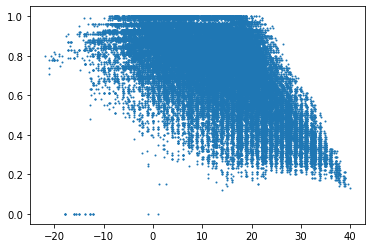

In [13]:
plt.scatter(xtemp, yhum, s = 1)
plt.show()

We can clearly see a negative relationship between our two variables.